# TPC2 - Sistemas de Equações Diferenciais e Algébricas

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>

# Introdução

Considere a linha de transmissão RLC da Figura, onde se quer analisar a voltagem, $V_{n}(t)$, em cada nodo $n\!=\!1,\!\cdots\!,N$ indicado no esquema. As resistências, indutâncias e capacidades na cadeia são todas iguais (respectivamente $R$, $L$ e $C$), tal que a evolução da voltagem em cada nodo é solução das seguintes equações lineares:

$$
LC\frac{d^{2}}{dt^{2}}V_{n}\left(t\right)\!+\!RC\frac{d}{dt}V_{n}\left(t\right)\!-\!V_{n+1}\left(t\right)\!-\!V_{n-1}\left(t\right)\!+\!2V_{n}\left(t\right)\!=\!0.
$$

<p float="left">
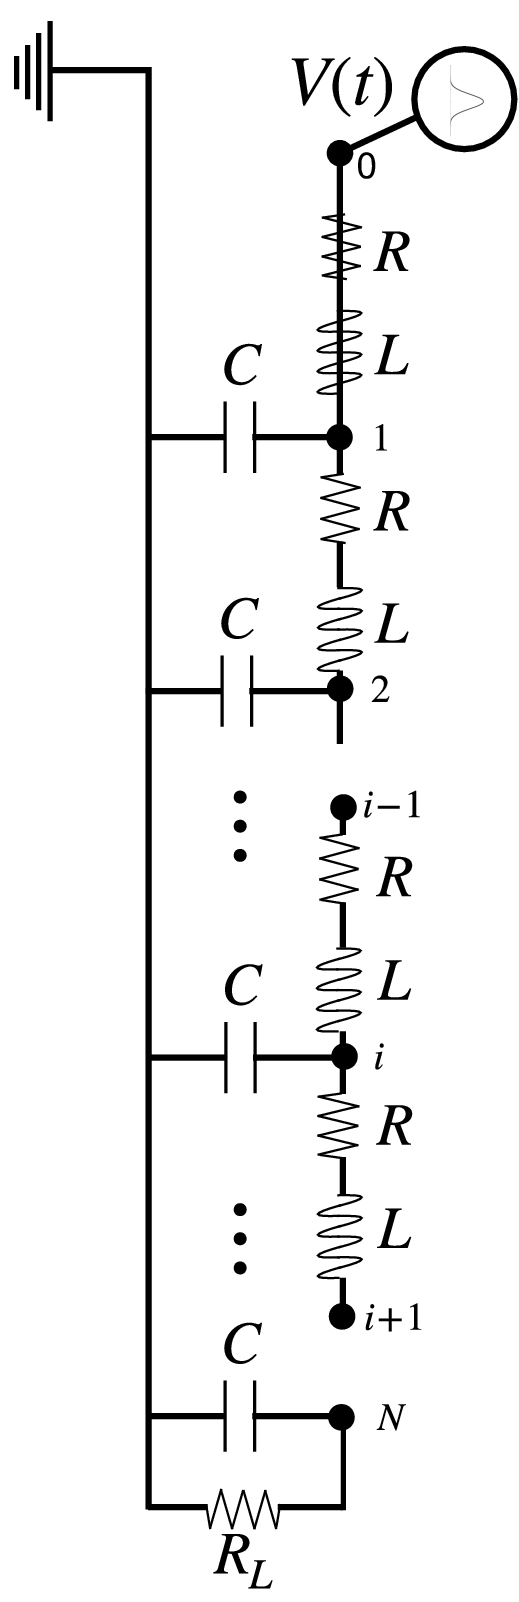
</p>

O nodo $n\!=\!0$ é forçado por uma voltagem externa dependente do tempo, $V_{0}\left(t\right)=V_{0}f(t)$, onde $f(t)$ é uma função arbitrária do tempo e $V_{0}$ é uma unidade de voltagem. Por fim, o nodo $n\!=\!N$ encontra-se ligado à terra através de uma resistência de carga, $R_{\text{L}}\!\neq\!R$ e um condensador, em paralelo. Assim sendo, a equação dinâmica para $V_{N}(t)$ tem uma forma ligeiramente diferente:

$$
LC\frac{d^{2}}{dt^{2}}\!V_{N}\!\left(t\right)\!+\!\left(\!RC\!+\!\frac{L}{R_{\text{L}}}\!\right)\frac{d}{dt}\!V_{N}\!\left(t\right)\!+\!\left(\!1\!+\!\frac{R}{R_{\text{L}}}\!\right)\!V_{N}\!\left(t\right)\!-\!V_{N-1}\!\left(t\right)	\!=\!0
$$


In [1]:
# Introduza o codigo geral aqui
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lin

# 1. Análise no Domínio das Frequências
1. Medindo o tempo em unidades de $\sqrt{LC}$, as resistências em unidades de $R_{\text{L}}$ e as voltagens em unidades de $V_{0}$, adimensionalize o sistema de equações anterior, obtendo.
$$
\begin{cases}
\frac{d^{2}}{d\tau^{2}}v_{1}\!\left(\tau\right)\!+\!\gamma\frac{d}{d\tau}\!v_{1}\!\left(\tau\right)\!-\!v_{2}\!\left(\tau\right)\!+\!2v_{1}\!\left(\tau\right)\!=\!f(\tau)\\
\frac{d^{2}}{d\tau^{2}}v_{n}\!\left(\tau\right)\!+\!\gamma\frac{d}{d\tau}\!v_{n}\!\left(\tau\right)\!-\!v_{n+1}\!\left(\tau\right)\!-\!v_{n-1}\!\left(\tau\right)\!+\!2v_{n}\!\left(\tau\right)\!=\!0 & 1\!<\!n\!<\!N\\
\frac{d^{2}}{d\tau^{2}}v_{N}\!\left(\tau\right)\!+\!\left(\frac{r}{\gamma}\!+\!\gamma\right)\frac{d}{d\tau}\!v_{N}\!\left(\tau\right)\!+\!\left(1\!+\!r\right)v_{N}\!\left(\tau\right)\!-\!v_{N-1}\!\left(\tau\right)\!=\!0
\end{cases}
$$
Determine os parâmetros adimensionais $\gamma$ e $r$.


Medindo o tempo em unidades de $\tau_0=\sqrt{L C}$, $t=\tau_0 \tau$, a derivada temporal torna-se $\frac{d}{dt}=\frac{1}{\tau_0}\frac{d}{d\tau}$ e o termo $L C$ cancela com a segunda derivada de $V_n$ nas novas unidades. A primeira equação fica

$$
\frac{d^{2}}{d\tau^{2}}V_{1}\left(\tau\right)\!+\frac{RC}{\sqrt{L C}}\frac{d}{d\tau}V_{1}\left(\tau\right)\!-\!V_{2}\left(\tau\right)+2V_{1}\left(\tau\right)\!=\!V_{0} f \left(\tau\right).
$$

$$
\frac{d^{2}}{d\tau^{2}}V_{n}\left(\tau\right)\!+\frac{RC}{\sqrt{L C}}\frac{d}{d\tau}V_{n}\left(\tau\right)\!-\!V_{n+1}\left(\tau\right)\!-\!V_{n-1}\left(\tau\right)\!+\!2V_{n}\left(\tau\right)\!=\!0.
$$

$$
\frac{d^{2}}{d\tau^{2}}\!V_{N}\!\left(\tau\right)\!+\frac{1}{\sqrt{L C}}\!\left(\!RC\!+\!\frac{L}{R_{\text{L}}}\!\right)\frac{d}{d\tau}\!V_{N}\!\left(\tau\right)\!+\!\left(\!1\!+\!\frac{R}{R_{\text{L}}}\!\right)\!V_{N}\!\left(\tau\right)\!-\!V_{N-1}\!\left(\tau\right)	\!=\!0
$$

Definindo $r=R/R_L$, $\gamma=R\sqrt{C/L}$ e $v_n =V_n/V_0$, obtemos o sistema de equações do enunciado.



In [2]:
# Responda Aqui

2. Tomando uma representação de $v_{n}\!\!\left(\tau\right)$ e $f(\tau)$ no espaço das frequências,
$$
v_{n}\left(\tau\right)\!=\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!d\omega v_{n}^{\omega}e^{i\omega\tau}\quad\text{e}\quad f\left(\tau\right)\!=\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!d\omega F^{\omega}e^{i\omega\tau},
$$

o sistema linear de ODEs transforma-se num sistema algébrico, parametrizado por $\omega$:

$$
\begin{cases}
\left(-\omega^{2}+i\gamma\omega+2\right)v_{1}^{\omega}-v_{2}^{\omega}=F^{\omega}\\
\left(-\omega^{2}+i\gamma\omega+2\right)v_{n}^{\omega}-v_{n+1}^{\omega}-v_{n-1}^{\omega}=0, & 1<n<N\\
\left(-\omega^{2}+i\left(\frac{r}{\gamma}+\gamma\right)\omega+1+r\right)v_{N}^{\omega}\left(\tau\right)-v_{N-1}^{\omega}=0
\end{cases}.
$$
Se $F^{\omega}\!\neq\!0$ a resposta do sistema no nodo $n$ é determinada pela função de resposta do sistema, $h_{n}^{\omega}=v_{n}^{\omega}/F^{\omega}$, determinada a partir de

$$
\begin{cases}
\left(-\omega^{2}+i\gamma\omega+2\right)h_{1}^{\omega}-h_{2}^{\omega}=1\\
\left(-\omega^{2}+i\gamma\omega+2\right)h_{n}^{\omega}-h_{n+1}^{\omega}-h_{n-1}^{\omega}=0, & 1<n<N\\
\left(-\omega^{2}+i\left(\frac{r}{\gamma}+\gamma\right)\omega+r+1\right)h_{N}^{\omega}-h_{N-1}^{\omega}=0
\end{cases}.
$$
O sistema é agora uma equação matricial, $\mathbb{M}_{\omega}\!\cdot\!\mathbf{h}_{\omega}\!=\!\mathbf{e}_{0}$, onde $\mathbf{h}=\left[h_{1}^{\omega},h_{2}^{\omega},\cdots,h_{N}^{\omega}\right]^{T}$ e $\mathbf{e}_{0}\!=\![1,0,\cdots,0]^{T}$. Escreva duas funções $\texttt{Python}$ que determinem a matriz $\mathbb{M}_{\omega}$ em forma densa e esparsa, recebendo $N$ e $\omega$ como parâmetro.

#Responda Aqui

In [3]:
# Geração da matriz em Banda (Forma Esparsa)
def Mat(omega,N,gamma,r):
    Mat_Esp         = np.zeros((3,N),dtype=complex)
    Mat_Esp[0,1:]   = -np.ones(N-1)
    Mat_Esp[-1,:-1] = -np.ones(N-1);
    Mat_Esp[1,-1]   = (-omega**2 + 1j*((r/gamma) + gamma)*omega + r + 1)
    Mat_Esp[1,0]    = (-omega**2 + 1j*gamma*omega + 2)
    Mat_Esp[1,1:-1] = (-omega**2 + 1j*gamma*omega + 2)*np.ones(N-2)
    return Mat_Esp

# Geração da matriz normal (densa)
def MatDense(omega, N, gamma, r):
    Mat_Dens = np.zeros([N,N], dtype=complex)
    sparse = Mat(omega, N, gamma, r)
    
    for i in range(N):
        Mat_Dens[i,i] = sparse[1,i]
    
    for i in range(N-1):
        Mat_Dens[i+1,i] = sparse[2,i]
        
    for i in range(1,N):
        Mat_Dens[i-1,i] = sparse[0,i]
        
    return Mat_Dens
    
    
# Testar as matrizes
w = 1.0
N = 6
g = 1.0
r = 1.0
M_sparse = Mat(w, N, g, r)
print(M_sparse,"\n")

M_dense = MatDense(w,N,g,r)
print(M_dense,"\n")



[[ 0.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
 [ 1.+1.j  1.+1.j  1.+1.j  1.+1.j  1.+1.j  1.+2.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  0.+0.j]] 

[[ 1.+1.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  1.+1.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  1.+1.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  1.+1.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  1.+1.j -1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  1.+2.j]] 



3. No caso em que $\gamma,r\to0$ e $F^{\omega}=0$, a equação anterior reduz-se a uma equação de valores próprios,
$$
\begin{cases}
2v_{1}^{\omega}-v_{2}^{\omega}=\omega^{2}v_{1}^{\omega}\\
2v_{n}^{\omega}-v_{n+1}^{\omega}-v_{n-1}^{\omega}=\omega^{2}v_{n}^{\omega}, & 1<n<N\\
v_{N}^{\omega}-v_{N-1}^{\omega}=\omega^{2}v_{N}^{\omega}
\end{cases}, 
$$
em que $\omega$ são as frequências próprias da linha.

(a) A $N$ fixo, escreva uma função que determine as frequências próprias usando o algoritmo $QR$ baseado na decomposição de Householder. [Sugestão: Imponha uma tolerância de $10^{-5}$ para a convergência da diagonalização].

#Responda Aqui

In [4]:
# Decomposição de Householder
def QR_Householder(A):
    DIM=len(A)

    Ai = A*1.0
    R = A*1.0
    Q = np.eye(DIM)
    for i in range(DIM):
        x = Ai[i:,i]
        u = x*1.0

        u[0] -= np.linalg.norm(x)
        v = u/np.linalg.norm(u)
        Qi = np.eye(DIM-i) - 2*np.outer(v,v)

        Qmult = np.eye(DIM)
        Qmult[i:,i:] = Qi
        Ai = Qmult@Ai
        Q = Q@Qmult
    R = Q.transpose()@A
    return Q,R


# Algoritmo QR com decomposição de Householder
def QR_algo(A, tol):

    DIM = len(A)

    V = np.eye(DIM) # vectores próprios
    D = A*1.0       # valores próprios
    
    max_iter = 200 # numero máximo de iterações
    for i in range(max_iter):
        Q,R = QR_Householder(D)
        D = R@Q
        V = V@Q
        
        norm = np.linalg.norm(D - np.diagflat(np.diag(D)))
        if norm < tol:
            break
            
    return D,V,i


# Matriz para calcular os valores próprios
def MatDense_eigen(N):
    mat = np.zeros([N,N])
    
    for i in range(N):
        mat[i,i] = 2
    mat[-1,-1] = 1
    
    for i in range(N-1):
        mat[i,i+1] = -1
        mat[i+1,i] = -1
        
    return mat

# Teste
N = 10
M = MatDense_eigen(N)
print("Matriz para usar no QR:\n",M)

D,V,i = QR_algo(M, 1e-5)
print("\nValores próprios:", np.diag(D), "\n")

# Verificação
norm = np.linalg.norm(V.transpose()@M@V-D)
print("Verificação da convergência: V^T M V - D =", norm)



Matriz para usar no QR:
 [[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]

Valores próprios: [3.91114561 3.65247755 3.2469796  2.73068205 2.14946019 1.55495813
 1.         0.53389626 0.19806226 0.02233835] 

Verificação da convergência: V^T M V - D = 8.84993133510471e-15


(b) Considere $N\!=\!16,32,64$ e determine todos os $\omega$s próprios do sistema. Mostre que estas frequências estão limitadas superiormente (indique o limite) e descreva qual o efeito de aumentar o número de nodos.

As frequências próprias estão limitadas superiormente por 2 e inferiormente por 0. Ao aumentar o número de nodos no circuíto, a forma das curvas não se altera e, a partir de um  número N suficientemente grande, todas as frequências colapsam na mesma curva. O efeito de aumentar o N é aumentar a densidade de pontos.

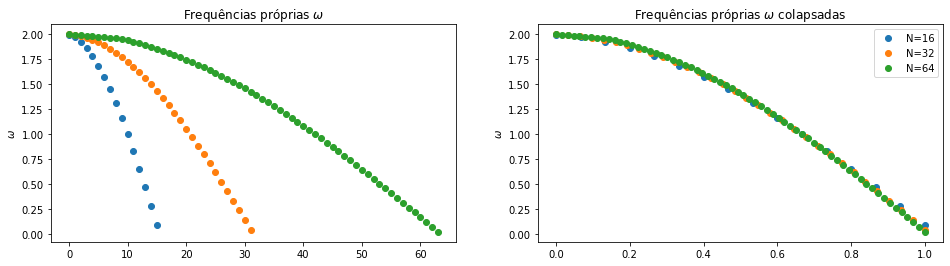

In [5]:
Ns = [16,32,64]
eigen_ws = []

for N in Ns:

    M = MatDense_eigen(N)
    D,V,i = QR_algo(M, 1e-5)
    DIM = len(M)
    diag = np.zeros(DIM)
    for i in range(DIM):
        diag[i] = D[i,i]
    eigen_ws.append(diag**0.5)

fig, axs = plt.subplots(1,2) 
fig.set_figwidth(16)
fig.set_figheight(4)
for i in range(3):
    w = eigen_ws[i]
    N = Ns[i]
    axs[0].plot(w,'o',label="N={0}".format(N))
    axs[1].plot(np.linspace(0,1,N),w,'o',label="N={0}".format(N))
    
axs[0].set_title(r"Frequências próprias $\omega$")
axs[1].set_title(r"Frequências próprias $\omega$ colapsadas")
axs[0].set_ylabel(r"$\omega$")
axs[1].set_ylabel(r"$\omega$")
plt.legend()
plt.show()

4. Considere agora $N\!\!=\!64$, $\gamma,\!r\!\neq\!0$. Escreva uma função que resolva a Eq.[1.6] para $\omega\!\in\![-1.5,\!1.5]$ , numa malha uniforme de $10^{5}$ pontos. Use o método $\mathtt{scipy.linalg.solve\text{\_}banded()}$ e retorne $h_{N}^{\omega}$.

(a) No mesmo gráfico, represente $\left|h_{N}^{\omega}\right|$ como função de $\omega$ para $(\gamma,r)\!=\!\{(10^{-5}\!,10^{-7});(10^{-3},10^{-5});(10^{-2},10^{-4});$ $(10^{-4},10^{-3});(10^{-2},10^{-1})\}$. [Sugestão: Use uma escala logarítmica na vertical.]

#Responda Aqui

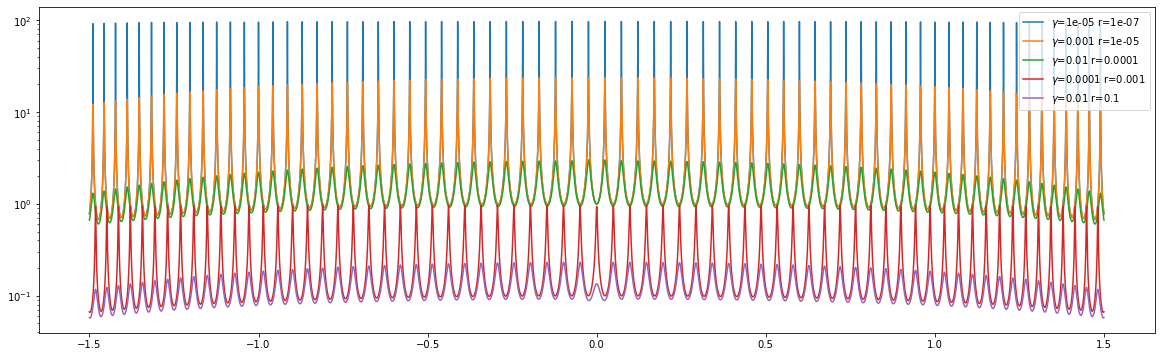

In [20]:
NW = 10**5
N  = 64
gs = [1e-5, 1e-3, 1e-2, 1e-4, 1e-2]
rs = [1e-7, 1e-5, 1e-4, 1e-3, 1e-1]
num = len(gs)

e0 = np.zeros(N, dtype=complex); e0[0] = 1
ws = np.linspace(-1.5, 1.5, NW)
hw = np.zeros([NW,num], dtype = complex)

for j in range(num):
    g = gs[j]
    r = rs[j]
    
    for i in range(NW):
        w = ws[i]
        M_sparse = Mat(w, N, g, r)
        hw[i,j] = lin.solve_banded((1,1),M_sparse, e0)[N-1]

fig, axs = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(6)
axs.set_yscale('log')
for i in range(num):
    g = gs[i]
    r = rs[i]
    axs.plot(ws, np.abs(hw[:,i]), label=r"$\gamma$={0} r={1}".format(g, r))
axs.legend()
plt.show()

(b) No gráfico anterior inclua linhas verticais nas primeiras 20 frequências próprias do sistema sem dissipação. Comente o que observa e explique as diferenças entre os gráficos.

As frequências próprias obtidas anteriormente descrevem os modos normais do sistema sem dissipação e com $R_L$ infinito. Quando existe pouca dissipação ($\gamma\approx 0$ e $\frac{r}{\gamma}\approx 0$), o sistema continua a ter uma resposta muito pronunciada a estas frequências, que são agora ressonâncias. Á medida que a dissipação no circuito ($\gamma$) é aumentada, estas ressonâncias alargam-se e tornam-se cada vez menos definidas. Note-se que as frequências próprias obtidas anteriormente referem-se ao caso em que a linha de transmissão termina num condensador, ou seja, $R_L = \infty$. Se $\frac{r}{\gamma}>1$ estamos na situação em que $R_L$ é pequeno e, portanto, a corrente que passa na resistência de carga não pode ser desprezada. Nesta situação, as ressonâncias do sistema aparecem deslocadas das frequências próprias calculadas anteriormente, uma vez que a terminação da linha já não é puramente capacitiva. No caso limite em que $R_L\to 0$, temos como condição fronteira $V_N=0$ o que geraria um conjunto de frequências próprias diferente.

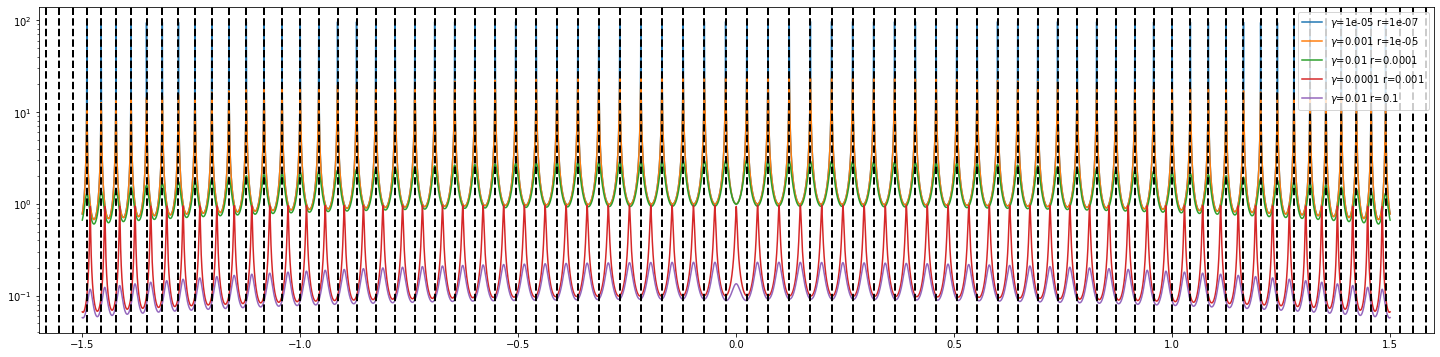

In [21]:

fig, axs = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(6)
axs.set_yscale('log')
for i in range(num):
    g = gs[i]
    r = rs[i]
    axs.plot(ws, np.abs(hw[:,i]), label=r"$\gamma$={0} r={1}".format(g, r))

for i in eigen_ws[2]:
    axs.axvline(i, linewidth=2, linestyle='--', color='k')
    axs.axvline(-i, linewidth=2, linestyle='--', color='k')

axs.legend()
axs.set_xlim(-1.6, 1.6)
plt.show()

5. Sabendo $h_{n}^{\omega}$ e $F^{\omega}$ podemos reconstruir a resposta temporal no nodo $n$, fazendo a transformada de Fourier inversa de $v_{n}^{\omega}=h_{n}^{\omega}F^{\omega}$. Tome $N = 64$ e o caso em que se injeta um sinal gaussiano da forma,
$$
f(\tau)=\frac{e^{-\frac{(\tau-\tau_{0})^{2}}{2\Delta^{2}}}}{\sqrt{2\pi\Delta^{2}}}\longrightarrow F^{\omega}\!\!=\!\!\int_{-\infty}^{\infty}\!\!\!\!\!\!d\tau f(\tau)e^{-i\omega\tau}=e^{-\frac{1}{2}\Delta^{2}\omega^{2}}e^{-i\tau_{0}\omega}.
$$

[Nota: Não se esqueça que a DFT se relaciona com a transformada de Fourier contínua por um fator
de escala: o inverso do espaçamento de tempos.]

(a) Represente o sinal $f(\tau)$ para vários valores de $\Delta$ e $\tau_{0}$. Interprete estes dois parâmetros de forma concisa.

O parâmetro $\Delta$ corresponde à largura da gaussiana, e o parâmetro $\tau_0$ à posição do centro da gaussiana no tempo.

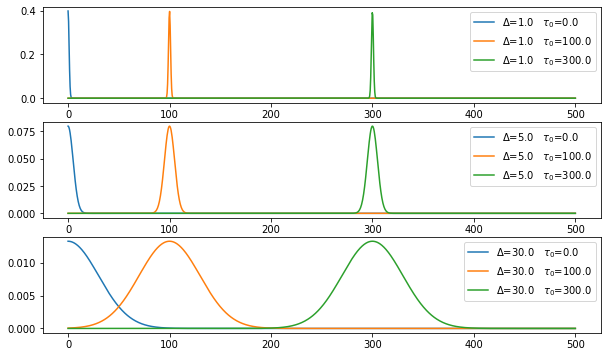

In [8]:
def f(t, t0, delta):
    arg = -(t - t0)**2/2/delta**2
    norm = np.sqrt(2*np.pi)*delta
    return np.exp(arg)/norm

def Fw(w, t0, delta):
    arg1 = -w**2/2*delta**2
    arg2 = -1j*t0*w
    return np.exp(arg1 + arg2)

deltas = [1.0, 5.0, 30.0]
t0s = [0.0, 100.0, 300.0]
NT = 1000
ts = np.linspace(0, 500, NT)

fig, axs = plt.subplots(3,1)
fig.set_figwidth(10)
fig.set_figheight(6)

for i,delta in enumerate(deltas):
    for t0 in t0s:
        y = f(ts, t0, delta)
        axs[i].plot(ts, y, label=r"$\Delta$={0}   $\tau_0$={1}".format(delta,t0))
    axs[i].legend()


(b) Escreva uma função que calcule $v_{n}(\tau)$ através da DFT inversa de $h_{n}^{\omega}F^{\omega}$. Use uma malha uniforme de $\omega$, espaçada de $0.001\pi$ e com um $\omega_{\text{max}}\!=\!30$. Especifique o dominio temporal para o qual $v_{n}(\tau)$ é calculada e o espaçamento entre tempos consecutivos. [Sugestão: Pode usar as rotinas de $\texttt{rfft}$ já implementadas no $\texttt{numpy}$]

#Responda Aqui

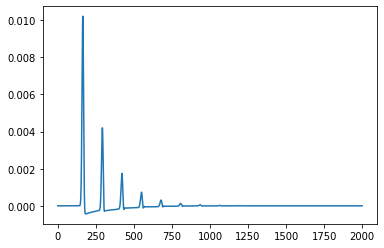

In [9]:
def calc_vw(N,n,g,r,t0,delta):
    dw = 0.001*np.pi
    ws = np.arange(0,30, dw)
    NW = len(ws) # rfft usa metade: NT -> NT/2 + 1
    NT = (NW-1)*2
    dt = np.pi*2/NT/dw
    
    e0 = np.zeros(N, dtype=complex); e0[0] = 1
    hw = np.zeros(NW, dtype = complex)
    ffw = hw*0.0

    for i in range(NW):
        w = ws[i]
        M_sparse = Mat(w, N, g, r)
        hw[i] = lin.solve_banded((1,1),M_sparse, e0)[n]
        ffw[i] = Fw(w, t0, delta)/dt

    vw = hw * ffw
    return ws,vw


def calc_vt(ws, vw):
    dw = ws[1] - ws[0]
    NW = len(ws)
    NT = (NW-1)*2
    dt = np.pi*2/NT/dw
    
    vt = np.fft.irfft(vw)

    # Calcular a lista de tempos:
    ts = np.arange(0,dt*NT, dt)
    return ts, vt


# Teste
N  = 64
g  = 0.01; r  = 0.1
t0 = 100; delta = 5.0
n = N

ws, vw = calc_vw(N,n-1, g, r, t0, delta)
ts, vt = calc_vt(ws, vw)
plt.plot(ts, vt)
plt.show()

(c) Tomando $\Delta\!=\!10$ e $\tau_{0}\!=\!200$, represente $f(\tau)$, $v_{16}(\tau)$, $v_{32}(\tau)$ e $v_{64}(\tau)$ num mesmo gráfico, para os parâmetros $(\gamma,r)\!=\!\{(10^{-3}\!,10^{-2});(10^{-2},10^{-1});$ $(10^{-1},1);(10^{-2},10^{-3})\}$. Descreva qualitativamente o que vê nos diferentes gráficos, não se esquecendo de especificar as unidades de tempo nos gráficos. Nalguns casos, o sistema parece ter uma resposta acausal! Identifique-os e explique a origem do fenómeno.

No primeiro gráfico, existe um valor não nulo para a voltagem nos nodos antes de o impulso chegar. Isto aparenta uma violação do princípio de causalidade na física (a resposta precede o impulso). Como temos um número finito de frequências, harmónicos da frequência mínima, qualquer função no domínio temporal descrita por uma série de Fourier tem um periodo $T$ fundamental. Isto também acontece para o impulso aplicado sendo que, o que estamos realmente a calcular é a resposta do sistema a um conjunto impulsos gaussianos, com um período de repetição $T$. Como observamos apenas numa janela temporal de largura $T$, sempre que o amortecimento da curva é suficientemente fraco, esta não chega a zero no instante em que o próximo impulso é aplicado ao sistema. É por isto que se observam residuos destas caudas no inicio do gráfico.

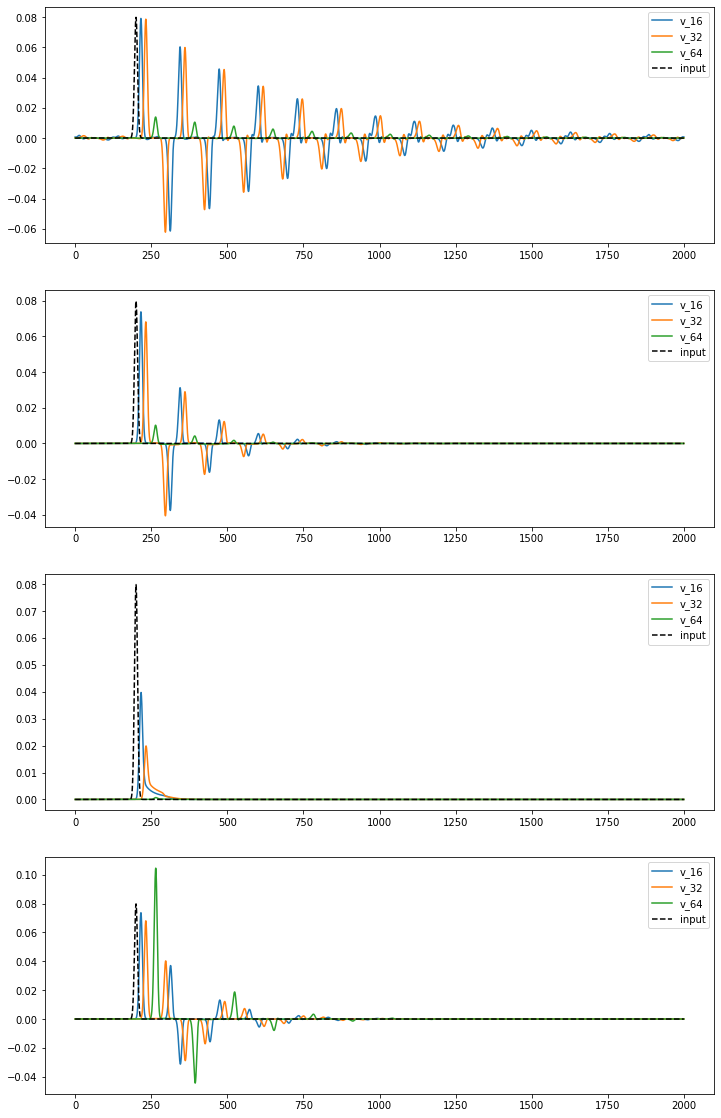

In [10]:
N  = 64; t0 = 200; delta = 5.0

nn = [16,32,64]; Nns = len(nn)
gs = [1e-3, 1e-2, 1e-1, 1e-2]; Ngs = len(gs)
rs = [1e-2, 1e-1,  1e0, 1e-3]; NRs = len(rs)

fig, axs = plt.subplots(Ngs)
fig.set_figwidth(12)
fig.set_figheight(20)
for i in range(Ngs):
    g = gs[i]
    r = rs[i]
    for j in range(Nns):
        n = nn[j]
        ws, vw = calc_vw(N,n-1,g,r,t0,delta)
        ts, vt = calc_vt(ws, vw)
        ft = f(ts, t0, delta)
        NT = len(ts)
        
        axs[i].plot(ts, vt, label="v_{0}".format(n))
        
    axs[i].plot(ts, ft, 'k--', label="input")
    axs[i].legend()
        
plt.show()

(d) Usando $\gamma=0.005$ e $r=0.02$ represente $v_{64}(\tau)$ para $\Delta\!=\!1,10,40$ ($\tau_{0}\!=\!200$). Quais as diferenças? Interprete os resultados pensando no efeito que uma redução na duração do sinal entrada tem no espectro da resposta.

A largura da gaussiana no domínio temporal é inversamente proporcional à largura da correspondente gaussiana no domínio das frequências. Quanto mais larga a gaussiana no tempo, mais estreita é nas frequências. O primeiro sinal tem uma duração muito curta e, por isso, corresponde a um $F^\omega$ bastante largo. Então, quando $F^\omega$ é multiplicada por $h_\omega$ existirão componentes relevantes a baixas e altas frequências em $v_\omega$. Quando vista no domínio temporal, estas componentes de alta frequência traduzem-se em variações rápidas oscilações no gráfico de $v(\tau)$. 

Em contraste, o terceiro sinal é muito largo temporalmente e, por isso, muito estreito no domínio das frequências. Ao multiplicar $F^\omega$ por $h_\omega$, só as componentes de mais baixa frequência sobrevivem em $v_\omega$. Assim, $v(\tau)$ é uma função lentamente variável no tempo. 

O segundo gráfico é um intermédio dos dois casos anteriores.

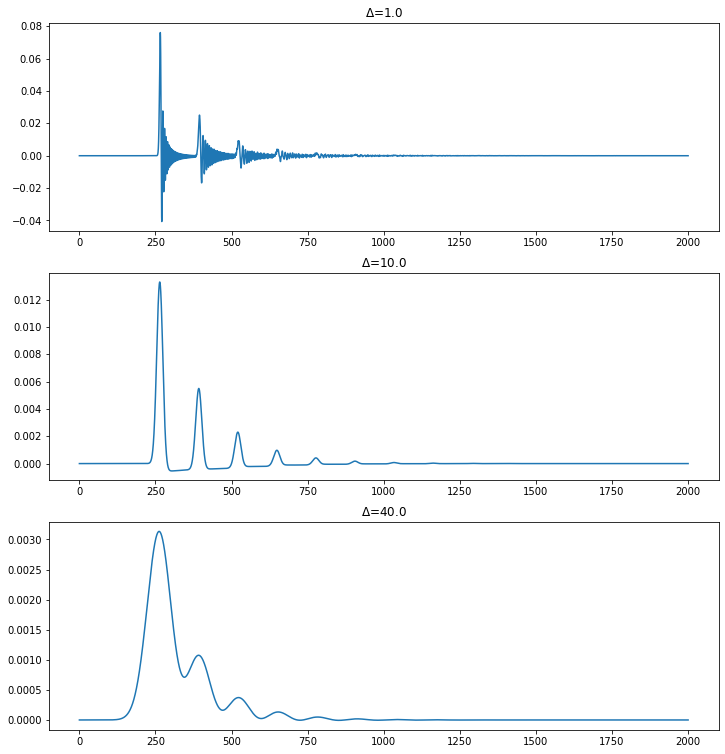

In [11]:
N = 64
n = 64
g = 5e-3
r = 2e-2
deltas = [1.0, 10.0, 40.0]; Ndeltas = len(deltas)
t0 = 200

fig, axs = plt.subplots(Ndeltas)
fig.set_figwidth(12)
fig.set_figheight(13)

for i in range(Ndeltas):
    delta = deltas[i]
    
    ws, vw = calc_vw(N,n-1,g,r,t0,delta)
    ts, vt = calc_vt(ws, vw)
    ft = f(ts, t0, delta)
    
    axs[i].plot(ts, np.real(vt))
    axs[i].set_title("$\Delta$={0}".format(delta))
        
plt.show()

6. A resistência de carga ($R_{\text{L}}$) representa um receptor do sinal introduzido na linha de transmissão. Calcule e represente a potência dissipada, por unidade de tempo, considerando $\Delta\!=\!10$, $\tau_{0}\!=\!200$, $\gamma=0.005$ e $r=0.01$. Como calcularia a energia total dissipada em $R_{\text{L}}$?

A energia total dissipada em $R_L$ seria dada pelo integral no tempo da potência dissipada. A potência é dada por $P=V_{64} I_{64} = V_{64}^2 / R_L$ onde $I_{64}$ é a corrente a passar pela resistência de carga $R_L$. A potência é medida em unidades de $V_0^2/R_L$. Para além disso, como a potência vai ser integrada em $\tau$ para o cálculo da energia total, temos de multiplicar por $\tau_0$ para obter um integrando adimensional. Nestas unidades, a potência é dada por $v_{64}^2(\tau)$

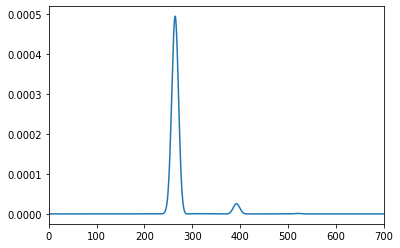

In [12]:
# P = V I = V^2/R

N = 64
n = 64
g = 5e-3
r = 1e-2
delta = 10
t0 = 200

fig, axs = plt.subplots()

ws, vw = calc_vw(N,n-1,g,r,t0,delta)
ts, vt = calc_vt(ws, vw)
axs.plot(ts, vt**2)
axs.set_xlim(0,700)
plt.show()

# 2. Exercício - Análise no Domínio Temporal

Agora vamos analisar a linha de transmissão usando métodos de espaço temporal. Considere o sistema de equações diferenciais lineares definido em 1.1 (já na sua forma adimensional). 

1. Escreva as equações na forma $\frac{d}{d\tau}\mathbf{y}=f\left(\mathbf{y}(\tau),\tau\right)$ onde $\mathbf{y}(\tau)$ é um vector $2N$ dimensional e implemente a função $f\left(\mathbf{y(\tau)},\tau\right)$ no $\texttt{Python}$. [Nota: Como se trata de um sistema linear forçado $f$ é uma função afim da forma, $f\left(\mathbf{y}(\tau),\tau\right)\!=\!\mathbb{C}\!\cdot\!\mathbf{y}(\tau)+\mathbf{b}(\tau)$, onde $\mathbb{C}$ é uma matriz constante.]


Começamos por definir $\mu_{n}(\tau)=\frac{dv_{n}(\tau)}{d\tau}$ e organizamos as $2N$ funções no seguinte vetor - $\mathbf{y}(\tau)=[\mu_{1}(\tau),v_{1}(\tau),\cdots,\mu_{N}(\tau),v_{N}(\tau)]$. Então, o método de integração toma a forma:

In [22]:
# Definição da matriz a ser usada no RK4
def Matrix(N,gamma,r):
    
    # parametros
    a = -gamma
    b = -((r/gamma) + gamma)
    c = -(1+r)
    
    CC = np.zeros((2*N,2*N))
    CC += np.diag(np.ones(2*N-1),-1)
    updiag1 = (-2)*np.ones(2*N-1); updiag1[1::2] = 0
    updiag2 = np.ones(2*N-3); updiag2[1::2] = 0
    diag = np.ones(2*N); diag[1::2] = 0; diag[::2] *= a
    CC += np.diag(updiag1,1) + np.diag(updiag2,3) + np.diag(diag,0)
    CC[-2,-1] = c; CC[-2,-2] = b
    return CC

# Função a entrar no RK4
def Dfunc(y, t, CC, t0, Delta):
    res    =  CC@np.transpose(np.array([y]))[:,0]
    res[0] += f(t,t0,Delta)
    return res
    

2. Implemente uma rotina de Runge-Kutta de 4ª ordem para integrar este sistema de equações diferenciais, dado um vector inicial $\mathbf{y}_{\!0}=\mathbf{y}(\tau\!=\!0)$. Nas seguintes alíneas considere sempre que $\mathbf{y}_{\!0}=[0,\cdots,0]$ e $N =64$.

(a) Considere que a função $f\!\left(\tau\right)$ é o impulso gaussiano da alínea 5 do exercício 1. Usando uma lista de tempos uniforme entre 0 e 2000, calcule $v_{64}\left(\tau\right)$ com $\Delta\!=\!5$, $\tau_{0}\!=\!200$, $N\!=\!64$, $\gamma\!=\!0.01$, $r\!=\!0.1$ com o método da alínea anterior. Estime o número de pontos temporais necessário para que $v_{64}\!\left(\tau\right)$ esteja completamente convergido.

Para este conjunto de parâmetros, usando 6000 e 36000 pontos no integrador RK4, a diferença é da ordem de 1% do valor da curva, por isso para efeitos práticos, vamos considerar que a solução numérica já está completamente convergida com 12000 pontos.

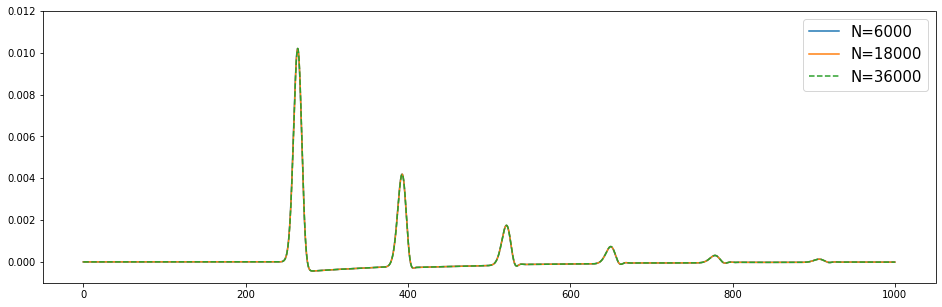

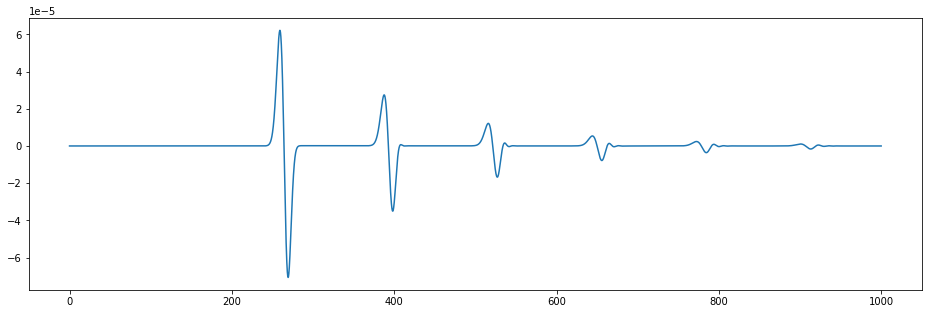

In [26]:
# Algoritmo de RK4
def RK4(f, x0, list_t, *args):
    D = len(x0)
    NT = len(list_t)
    
    h = list_t[1] - list_t[0]
    
    rk4 = np.zeros([NT,D])
    rk4[0,:] = x0
    
    x = x0*1.0
    for i in range(1,NT):
        t = list_t[i]
        k1 = h*f(x,t, *args)
        k2 = h*f(x+0.5*k1, t+0.5*h, *args)
        k3 = h*f(x+0.5*k2, t+0.5*h, *args)
        k4 = h*f(x+k3, t+h, *args)
        x += (k1 + 2*k2 + 2*k3 + k4)/6.0
        rk4[i,:] = x        
    return rk4

# Parâmetros da simulação
N = 64
g = 0.01; r  = 0.1
t0 = 200.0; delta = 5.0

# Integração temporal, vamos testar vários números de pontos
NT = 6000
T = 1000
yy   = np.zeros(2*N)
tt1  = np.linspace(0,T,NT)
tt2  = np.linspace(0,T,NT*2)
tt3  = np.linspace(0,T,NT*4)

CC    = Matrix(N,g,r)
data1 = RK4(Dfunc, yy, tt1, CC, t0, delta)
data2 = RK4(Dfunc, yy, tt2, CC, t0, delta)
data3 = RK4(Dfunc, yy, tt3, CC, t0, delta)

plt.figure(figsize=(16,5))
for n in [64]:
    plt.plot(tt1,data1[:,2*n-1], label="N={0}".format(NT))
    plt.plot(tt2,data2[:,2*n-1], label="N={0}".format(NT*3))
    plt.plot(tt3,data3[:,2*n-1],'--', label="N={0}".format(NT*6))
    
plt.ylim(-0.001,0.012)
plt.legend(fontsize=15)


plt.figure(figsize=(16,5))
for n in [64]:
#     plt.plot(tt1,data1[:,2*n-1], label="N={0}".format(NT))
    plt.plot(tt2,data2[:,2*n-1]-data3[::2,2*n-1], label="N={0}".format(NT*2))
#     plt.plot(tt3,data3[:,2*n-1],'--', label="N={0}".format(NT*3))
    


(b) Represente $f\!\left(\tau\right)$ e $v_{n}\!\left(\tau\right)$ para $n=1,8,16,32$ e $64$ no mesmo gráfico, calculados com os parâmetros anteriores.

#Responda Aqui

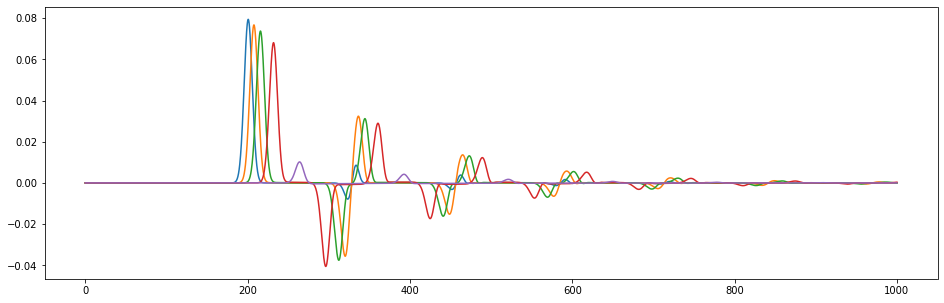

In [15]:
# Parâmetros da simulação
N = 64
gamma = 0.01; r  = 0.1
t0 = 200.0; delta = 5.0

# Integração temporal
NT = 4000
yy = np.zeros(2*N)
tt = np.linspace(0,1000,NT)
CC = Matrix(N,gamma,r)

data = RK4(Dfunc, yy, tt, CC, t0, delta)

plt.figure(figsize=(16,5))
for n in [1,8,16,32,64]:
    plt.plot(tt,data[:,2*n-1])

(c) Use uma rotina FFT (real) para calcular $v_{64}^{\omega}$ e compare com o que obteve na alínea 4a do exercício 1. Deverá obter a mesma resposta. 

#Responda Aqui

dw: 0.0031415926535897933
dw_RK: 0.0031415926535897933
dt_RK 0.10471752447772134


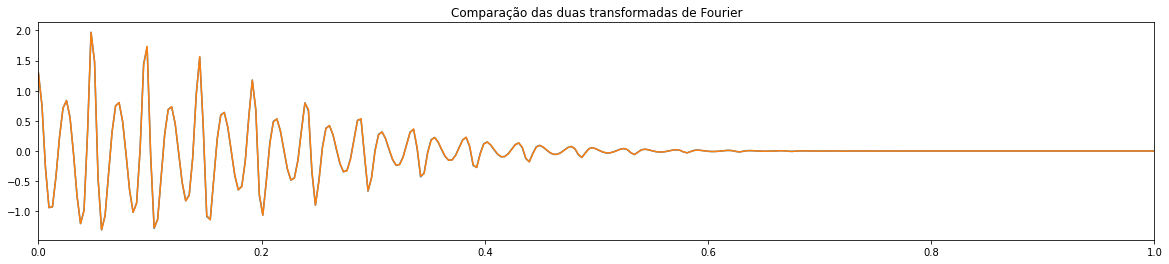

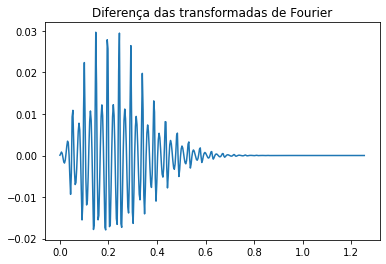

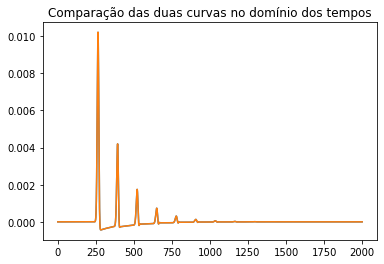

In [16]:
N = 64
n = N
g = 0.01; r  = 0.1
t0 = 200.0; delta = 5.0

# Cálculo nas frequencias
ws, vw = calc_vw(N,n-1,g,r,t0,delta)
ts, vt = calc_vt(ws, vw)


# Integração temporal, usando um numero de pontos especial
NW = len(ws)
NT_RK = NW*2
yy_RK = np.zeros(2*N)
T = 2000
tt_RK = np.linspace(0,T,NT_RK)
dt_RK = tt_RK[1] - tt_RK[0]
dw_RK = np.pi*2/T
ws_RK = np.arange(0,(NT_RK-1+0.00001)*dw_RK, dw_RK)
ws_RK_rfft = ws_RK[:NT_RK//2+1]

CC = Matrix(N,g,r)
data = RK4(Dfunc, yy_RK, tt_RK, CC, t0, delta)
vw_RK4 = np.fft.rfft(data[:,2*n-1])


print("dw:", ws[1] - ws[0])
print("dw_RK:", dw_RK)
print("dt_RK", dt_RK)

fig, axs = plt.subplots()
fig.set_figwidth(20)
axs.set_title("Comparação das duas transformadas de Fourier")
axs.plot(ws, np.real(vw))
axs.plot(ws_RK_rfft, np.real(vw_RK4))
axs.set_xlim(0,1.0)
plt.show()

plt.title("Diferença das transformadas de Fourier")
plt.plot(ws[:400], np.real(vw_RK4[:400]) -  np.real(vw[:400]))
plt.show()

plt.title("Comparação das duas curvas no domínio dos tempos")
plt.plot(ts, vt)
plt.plot(tt_RK, data[:,2*n-1])
plt.show()

(d) Repita a comparação da alínea anterior usando $\gamma=0.003$ e $r=0.5$. Como explica a diferença?

[Sugestão: As diferenças envolvidas são um pequeno efeito. É útil representar a diferença entre as duas transformadas de Fourier, em vez de sobrepôr os gráficos.]

Bom Trabalho

Esta diferença é explicada da mesma forma que na alínea 1.4c). Com o RK4, não existe problema de acausalidade, mas com o método no domínio das frequências, existe. No gráfico das curvas em função do tempo, esta diferença é clara para tempos pequenos. Esta é a origem da diferença. O efeito disto no domínio das frequências pode ser entendido a partir daqui. A curva calculada com o método do domínio das frequências tem a cauda (que apareceria a $\tau>T$) sobreposta com a resposta causal. Esta cauda consiste em oscilações com um periodo $T_1\approx 125$, logo tem componentes de Fourier apreciáveis que são múltiplos da frequência correspondente a este periodo de oscilação: $\omega_k = 2\pi k/ T_1 \approx 0.05 k$. É exactamente nestes sítios que está a principal diferença face à transformada de Fourier do $v_{64}(\tau)$ calculado com RK4.

dw: 0.0031415926535897933
dw_RK: 0.0031415926535897933
dt_RK 0.005235615800041361


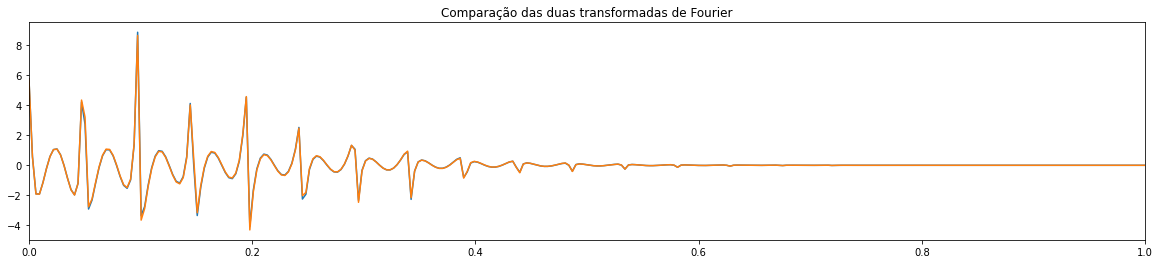

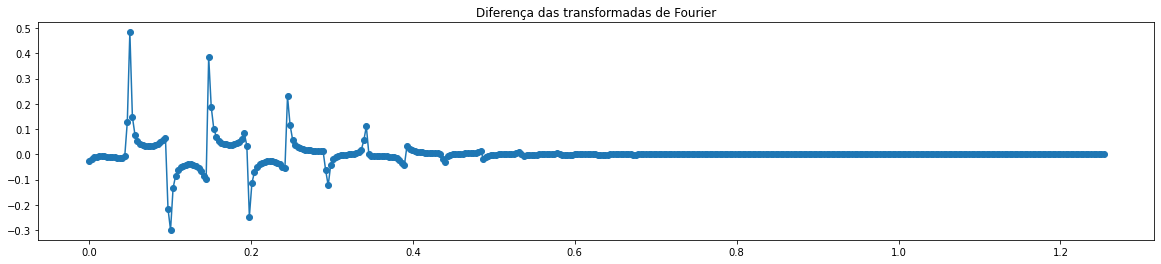

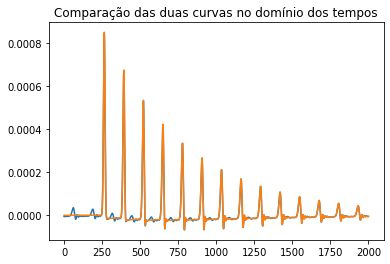

In [17]:
N = 64
n = N
g = 0.003; r  = 0.5
t0 = 200.0; delta = 5.0

# Cálculo nas frequencias
ws, vw = calc_vw(N,n-1,g,r,t0,delta)
ts, vt = calc_vt(ws, vw)


# Integração temporal, usando um numero de pontos especial
NW = len(ws)
NT_RK = NW*40
yy_RK = np.zeros(2*N)
T = 2000
tt_RK = np.linspace(0,T,NT_RK)
dt_RK = tt_RK[1] - tt_RK[0]
CC = Matrix(N,g,r)
data = RK4(Dfunc, yy_RK, tt_RK, CC, t0, delta)

# Transformada de Fourier 
dw_RK = np.pi*2/T
ws_RK = np.arange(0,(NT_RK-1+0.00001)*dw_RK, dw_RK)
ws_RK_rfft = ws_RK[:NT_RK//2+1]
vw_RK4 = np.fft.rfft(data[:,2*n-1])


print("dw:", ws[1] - ws[0])
print("dw_RK:", dw_RK)
print("dt_RK", dt_RK)

fig, axs = plt.subplots()
fig.set_figwidth(20)
axs.set_title("Comparação das duas transformadas de Fourier")
axs.plot(ws, np.real(vw)*20)
axs.plot(ws_RK_rfft, np.real(vw_RK4))
axs.set_xlim(0,1.0)
plt.show()

fig, axs = plt.subplots()
fig.set_figwidth(20)
axs.set_title("Diferença das transformadas de Fourier")
axs.plot(ws[:400], np.real(vw_RK4[:400]) -  np.real(vw[:400])*20,'o-')
plt.show()

plt.title("Comparação das duas curvas no domínio dos tempos")
plt.plot(ts, vt)
plt.plot(tt_RK, data[:,2*n-1])
plt.show()